<a href="https://colab.research.google.com/github/glo-code/ecommerce-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime

In [15]:
df=pd.read_csv('Amazon Sale Report.csv',parse_dates=True,low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111937,111937,406-6747505-1381166,06-12-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,BL104,BL104-M,Blouse,...,INR,493.00,KOLKATA,WEST BENGAL,700047.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
111938,111938,405-0625596-8093934,06-12-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-S,Western Dress,...,INR,735.00,BENGALURU,KARNATAKA,560087.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
111939,111939,407-8280538-2503529,06-12-22,Shipped,Amazon,Amazon.in,Expedited,JNE3800,JNE3800-KR-M,Western Dress,...,INR,735.00,JAIPUR,RAJASTHAN,302033.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
111940,111940,407-8280538-2503529,06-12-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-A-M,Western Dress,...,INR,771.00,JAIPUR,RAJASTHAN,302033.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False




```
Dividiamo in più colonne la colonna e raggruppiamo i clienti in base agli ordini effettuati in determinate date

```



In [25]:
data=pd.to_datetime(df['Date'])
df['months']=data.dt.month_name()
df['year']=data.dt.year
df['day']=data.dt.day


group=df.groupby(['day','months','year'])[['Order ID','Status']].value_counts().reset_index()
mask=np.where(group['count']<group['count'].max())[0]
print('Order less than max:',group['count'].iloc[mask].sum(),'in the day:',group.iloc[mask])
mask2=group['count'][group['count']==group['count'].max()]
print('Order == max:',mask2.value_counts(),'in the day:',group.iloc[mask2.index])
group

<ipython-input-25-69499e0349f9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.to_datetime(df['Date'])


Order less than max: 111918 in the day:         day months  year             Order ID                        Status  \
0         1  April  2022  403-9984530-4477124                       Shipped   
1         1  April  2022  407-3670630-4326760                       Shipped   
2         1  April  2022  404-5543645-7254764                       Shipped   
3         1  April  2022  406-7490066-8351568                       Shipped   
4         1  April  2022  406-9040211-5250700                       Shipped   
...     ...    ...   ...                  ...                           ...   
104469   31    May  2022  408-8238744-4546720                     Cancelled   
104470   31    May  2022  408-8236219-6067504  Shipped - Delivered to Buyer   
104471   31    May  2022  408-8112256-7500319                       Shipped   
104472   31    May  2022  408-9000635-9469161                       Shipped   
104473   31    May  2022  408-9910860-9722745                     Cancelled   

        cou

,day,months,year,Order ID,Status,count
0,1,April,2022,403-9984530-4477124,Shipped,7
1,1,April,2022,407-3670630-4326760,Shipped,4
2,1,April,2022,404-5543645-7254764,Shipped,4
3,1,April,2022,406-7490066-8351568,Shipped,3
4,1,April,2022,406-9040211-5250700,Shipped,3
...,...,...,...,...,...,...
104469,31,May,2022,408-8238744-4546720,Cancelled,1
104470,31,May,2022,408-8236219-6067504,Shipped - Delivered to Buyer,1
104471,31,May,2022,408-8112256-7500319,Shipped,1
104472,31,May,2022,408-9000635-9469161,Shipped,1


In [32]:
count=group.groupby('months')['Status'].value_counts().unstack()
count=count.fillna(0).astype(int)
count

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
months,,,,,,,,,,,,,
April,6726,1,0,27176,0,11093,2,1,2,6,849,2,0
June,2742,576,262,11657,1,2910,0,30,904,5,118,112,8
March,18,0,0,123,0,16,0,0,0,0,1,0,0
May,5469,6,0,23433,0,9547,2,1,5,0,661,9,0


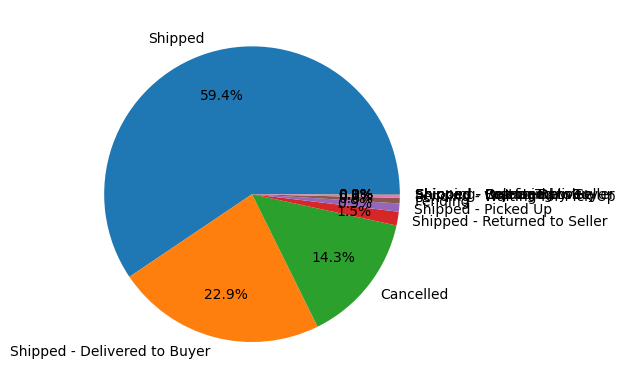

In [60]:
total=df['Status'].value_counts().sum()
status=df['Status'].value_counts().apply(lambda x:x/total*100).round(1).reset_index()
value=status['count']
fig,ax=plt.subplots()
labels=status['Status']
plt.pie(value,labels=labels,autopct='%1.1f%%',pctdistance=0.7)
plt.show()

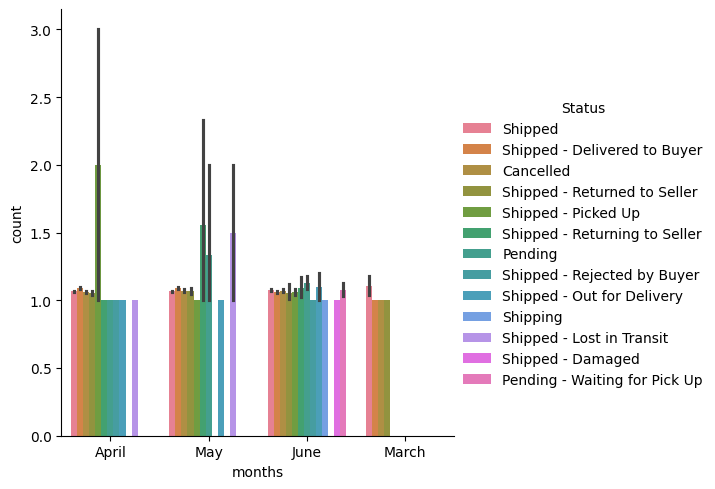

In [70]:
sns.catplot(group,x=group['months'],y=group['count'],kind='bar',hue='Status')